# Radar & Pizza Plots

A radar plot or a pizza plot are ways of visualizing data in a circular manner. 

You'll see them commonly used when comparing different metrics of a player or team.

It's really common to use them to compare percentiles of a player in different metrics or compare two players against each other.

In [55]:
# Lets get our data from fbref
import pandas as pd

url = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={'id': 'stats_standard'})[0]

In [56]:
df.head(10)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA              MF,FW   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5  Salis Abdul Samed             gh GHA                 MF   
5                  6    Laurent Abergel             fr FRA                 MF   
6                  7     Matthis Abline             fr FRA                 FW   
7                  8              Abner             br BRA                 DF   
8                  9  Zakaria Aboukhlal             ma MAR              MF,FW   
9                 10        Abdel Abqar             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             24-097   
1       Union Berlin       de Bundesliga             23-171   
2     Eint Frankfurt       de Bundesliga             20-228   
3              Reims          fr Ligue 1             36-195   
4               Lens          fr Ligue 1             24-015   
5            Lorient          fr Ligue 1             31-069   
6             Nantes          fr Ligue 1             21-013   
7              Betis          es La Liga             23-319   
8           Toulouse          fr Ligue 1             24-052   
9             Alavés          es La Liga             25-031   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000           15     12  ...           0.08  0.08  0.00   
1               2000           24      9  ...           0.00  0.22  0.22   
2               2003            7      1  ...           0.89  0.89  0.00   
3               1987           25     25  ...           0.00  0.12  0.12   
4               2000           25     17  ...           0.00  0.00  0.00   
5               1993           28     28  ...           0.04  0.07  0.04   
6               2003           17      7  ...           0.00  0.42  0.42   
7               2000           18     14  ...           0.00  0.00  0.00   
8               2000            8      4  ...           0.00  0.63  0.42   
9               1999           21     21  ...           0.00  0.00  0.00   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.08  0.00  0.07   0.07  0.00     0.07             Matches  
1   0.22  0.17  0.12   0.28  0.17     0.28             Matches  
2   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3   0.12  0.10  0.01   0.11  0.10     0.11             Matches  
4   0.00  0.05  0.03   0.08  0.05     0.08             Matches  
5   0.07  0.03  0.07   0.11  0.03     0.11             Matches  
6   0.42  0.24  0.23   0.46  0.24     0.46             Matches  
7   0.00  0.01  0.04   0.05  0.01     0.05             Matches  
8   0.42  0.46  0.04   0.50  0.29     0.33             Matches  
9   0.00  0.02  0.00   0.02  0.02     0.02             Matches  

[10 rows x 38 columns]

In [57]:
# You might notice that the column names are a bit weird, let's fix that

# We'll get rid of the per 90 columns and we will recalculate the ones we are interested in
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]


In [58]:
df.head(10)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA              MF,FW   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5  Salis Abdul Samed             gh GHA                 MF   
5                  6    Laurent Abergel             fr FRA                 MF   
6                  7     Matthis Abline             fr FRA                 FW   
7                  8              Abner             br BRA                 DF   
8                  9  Zakaria Aboukhlal             ma MAR              MF,FW   
9                 10        Abdel Abqar             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             24-097   
1       Union Berlin       de Bundesliga             23-171   
2     Eint Frankfurt       de Bundesliga             20-228   
3              Reims          fr Ligue 1             36-195   
4               Lens          fr Ligue 1             24-015   
5            Lorient          fr Ligue 1             31-069   
6             Nantes          fr Ligue 1             21-013   
7              Betis          es La Liga             23-319   
8           Toulouse          fr Ligue 1             24-052   
9             Alavés          es La Liga             25-031   

  Unnamed: 7_level_0 Playing Time         ... Performance      Expected       \
                Born           MP Starts  ...        CrdY CrdR       xG npxG   
0               2000           15     12  ...           1    0      0.0  0.0   
1               2000           24      9  ...           3    1      1.6  1.6   
2               2003            7      1  ...           0    0      0.1  0.1   
3               1987           25     25  ...           4    0      2.4  2.4   
4               2000           25     17  ...           2    0      0.8  0.8   
5               1993           28     28  ...           3    0      0.9  0.9   
6               2003           17      7  ...           1    0      1.7  1.7   
7               2000           18     14  ...           3    0      0.1  0.1   
8               2000            8      4  ...           1    0      2.2  1.4   
9               1999           21     21  ...           9    0      0.3  0.3   

                Progression           Unnamed: 37_level_0  
   xAG npxG+xAG        PrgC PrgP PrgR             Matches  
0  0.8      0.8          19   40   22             Matches  
1  1.1      2.6          23   24   46             Matches  
2  0.1      0.2           2    5    7             Matches  
3  0.3      2.7          33  117    7             Matches  
4  0.5      1.3           8   77   20             Matches  
5  2.0      2.9          33  160   47             Matches  
6  1.6      3.3          14   12   59             Matches  
7  0.6      0.7          13   29   57             Matches  
8  0.2      1.6          14   13   46             Matches  
9  0.0      0.4           5   42    0             Matches  

[10 rows x 28 columns]

In [59]:
# This will get rid of the first level of the multiindex on the columns
df = df.droplevel(0, axis=1)

In [60]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-097,2000,15,12,...,1,0,0.0,0.0,0.8,0.8,19,40,22,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,23-171,2000,24,9,...,3,1,1.6,1.6,1.1,2.6,23,24,46,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-228,2003,7,1,...,0,0,0.1,0.1,0.1,0.2,2,5,7,Matches
3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-195,1987,25,25,...,4,0,2.4,2.4,0.3,2.7,33,117,7,Matches
4,5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,24-015,2000,25,17,...,2,0,0.8,0.8,0.5,1.3,8,77,20,Matches
5,6,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,31-069,1993,28,28,...,3,0,0.9,0.9,2.0,2.9,33,160,47,Matches
6,7,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-013,2003,17,7,...,1,0,1.7,1.7,1.6,3.3,14,12,59,Matches
7,8,Abner,br BRA,DF,Betis,es La Liga,23-319,2000,18,14,...,3,0,0.1,0.1,0.6,0.7,13,29,57,Matches
8,9,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-052,2000,8,4,...,1,0,2.2,1.4,0.2,1.6,14,13,46,Matches
9,10,Abdel Abqar,ma MAR,DF,Alavés,es La Liga,25-031,1999,21,21,...,9,0,0.3,0.3,0.0,0.4,5,42,0,Matches


In [61]:
# We Are only going to be looking at FWs so we will filter the data to only include those players
# As well we only want to be looking at player who have played more than 400 minutes

# The reason we are only looking at FWs is because we want to compare players who play in similar positions
# The reason we are only looking at players who have played more than 400 minutes is because we want to compare players who have played a significant amount of time and we don't want to inflate stats of players by comparing them to players who have played very little
df = df[df['Pos'].str.contains('FW')]
df = df[df['Min'].astype(int) > 400]
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,23-171,2000,24,9,...,3,1,1.6,1.6,1.1,2.6,23,24,46,Matches
6,7,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-013,2003,17,7,...,1,0,1.7,1.7,1.6,3.3,14,12,59,Matches
8,9,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-052,2000,8,4,...,1,0,2.2,1.4,0.2,1.6,14,13,46,Matches
15,16,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,24-072,2000,26,22,...,2,0,11.0,11.0,1.1,12.1,33,14,107,Matches
18,19,Sargis Adamyan,am ARM,"FW,MF",Köln,de Bundesliga,30-323,1993,15,5,...,1,0,3.1,3.1,1.6,4.7,15,14,31,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,2725,Bryan Zaragoza,es ESP,"MF,FW",Granada,es La Liga,22-351,2001,21,18,...,5,0,3.8,3.0,3.3,6.3,100,36,127,Matches
2846,2738,Edon Zhegrova,xk KVX,FW,Lille,fr Ligue 1,25-010,1999,27,22,...,2,0,5.6,5.6,5.8,11.5,97,77,268,Matches
2851,2743,Joshua Zirkzee,nl NED,FW,Bologna,it Serie A,22-324,2001,29,27,...,6,0,8.5,6.9,4.4,11.4,45,68,158,Matches
2862,2753,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-324,1990,20,13,...,2,0,4.5,2.2,1.2,3.4,3,15,33,Matches


In [62]:
# Now let's calculate the percentiles for each player in the columns we're interested in
# We can calculate the percentiles using the .rank() method

# Let's look at the columns we are interested in
df[['90s', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR']].head(10)

# let's also make sure that the columns are of the correct type
df[['90s', 'xG', 'xAG']] = df[['90s', 'xG', 'xAG']].astype(float)
df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']].astype('Int64')


In [63]:
# Now let's calculate the per 90 stats for each of these columns
# But we will name them as we want to see them in the radar plot
df['goals_per_90'] = df['Gls'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['goals_assists_per_90'] = df['G+A'] / df['90s']
df['expected_goals_per_90'] = df['xG'] / df['90s']
df['expected_assists_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [64]:
# We'll calculate the percentiles for each of these columns
# We will also name them as we want to see them in the radar plot
# Replace NaN or inf values with a default value (e.g., 0)
df.fillna(0, inplace=True)

# Perform rank and conversion to integer
df['Goals'] = (df['goals_per_90'].rank(pct=True, na_option='keep') * 100).astype(int)
df['Assists'] = (df['assists_per_90'].rank(pct=True, na_option='keep') * 100).astype(int)
df['Goals + Assists'] = (df['goals_assists_per_90'].rank(pct=True, na_option='keep') * 100).astype(int)
df['Expected Goals'] = (df['expected_goals_per_90'].rank(pct=True, na_option='keep') * 100).astype(int)
df['Expected Assists'] = (df['expected_assists_per_90'].rank(pct=True, na_option='keep') * 100).astype(int)
df['Progressive Carries'] = (df['progressive_carries_per_90'].rank(pct=True, na_option='keep') * 100).astype(int)
df['Progressive Passes'] = (df['progressive_passes_per_90'].rank(pct=True, na_option='keep') * 100).astype(int)
df['Progressive Receptions'] = (df['progressive_receptions_per_90'].rank(pct=True, na_option='keep') * 100).astype(int)


### Now that we have our data, lets start by plotting a radar plot for a single player

In [65]:
from mplsoccer import Radar

In [66]:
# Let's plot a radar for Mbappe
mbappe = df[df['Player'] == 'Kylian Mbappé']
mbappe

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
1698,1634,Kylian Mbappé,fr FRA,FW,Paris S-G,fr Ligue 1,25-112,1998,26,22,...,4.930233,11.674419,99,87,99,99,83,90,88,96


In [67]:
columns_to_plot = [
    'Goals', 'Assists', 'Goals + Assists', 'Expected Goals', 
    'Expected Assists', 'Progressive Carries', 'Progressive Passes', 'Progressive Receptions'
]

# If there was a stat that meant having a lower value was better we can use the parameter
# lower_is_better to make the radar plot reflect that
# example: lower_is_better=['Goals Conceded']
# And then add that parameter to the Radar object

radar = Radar(
    # These are the columns we want to plot
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],# Since we are plotting percentiles the minimum value is 0
    max_range=[100 for _ in columns_to_plot], # The maximum value is the maximum percentile
    # lower_is_better=lower_is_better
)

Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ')

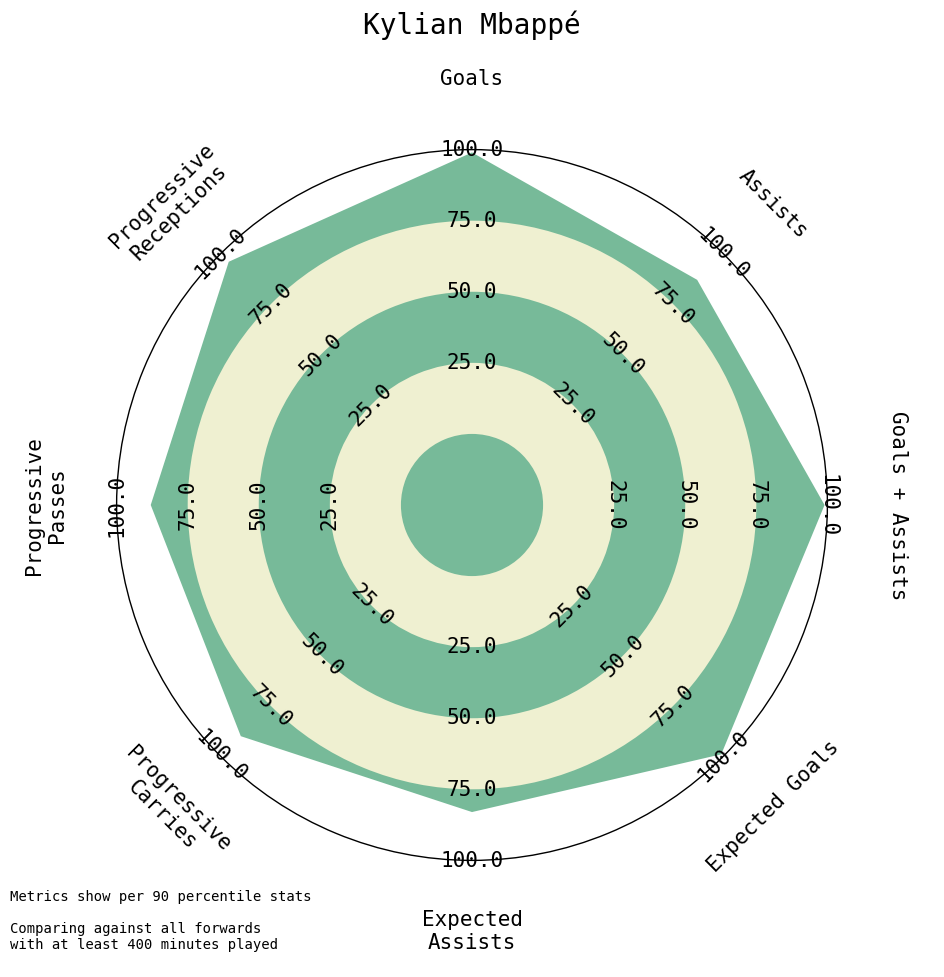

In [68]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar(
    ax=ax,
    values=mbappe[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#77BA99'},
    kwargs_rings={'facecolor': '#EFF0D1'}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)
# draw the range labels
param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.5, y=1.02, s='Kylian Mbappé', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

In [69]:
# Now let's compare two players
# We'll compare Mbappe and Haaland
haaland = df[df['Player'] == 'Erling Haaland']
haaland

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
1086,1046,Erling Haaland,no NOR,FW,Manchester City,eng Premier League,23-264,2000,25,24,...,0.769231,4.401709,98,74,97,99,68,17,3,14


Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played\n@mckayjohns')

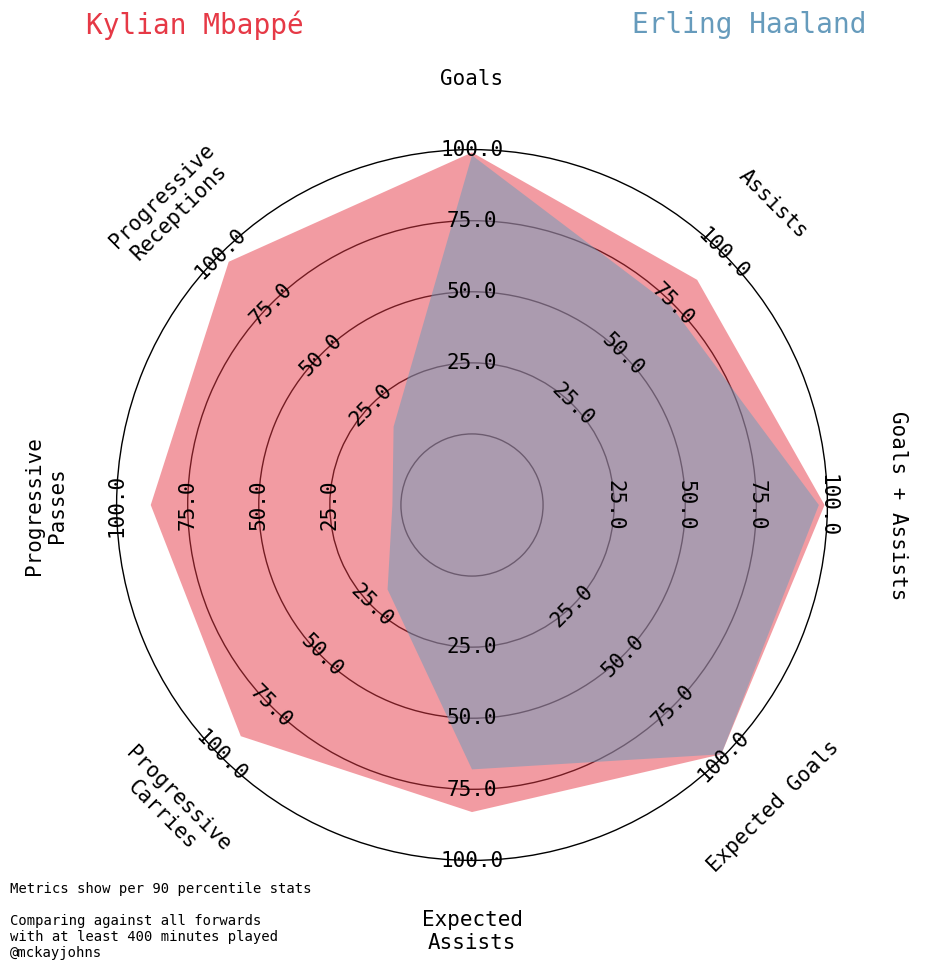

In [70]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar_compare(
    ax=ax,
    values=mbappe[columns_to_plot].values.flatten().tolist(),
    compare_values=haaland[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#e63946', 'alpha': 0.5},
    kwargs_compare={'facecolor': '#669bbc', 'alpha': 0.5}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)

param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.2, y=1.02, s='Kylian Mbappé', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#e63946'
)

ax.text(
    x=0.8, y=1.02, s='Erling Haaland', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#669bbc'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played\n@mckayjohns', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

### There is a ton of customization that can be done with these plots and it would be impossible to cover all of it in this notebook.

You can check out the documentation here: https://mplsoccer.readthedocs.io/en/latest/

In [71]:
fig.savefig('C:/Users/Ayush/OneDrive/Desktop/complete-football-analytics-main/pizza_plot.png', dpi=300, bbox_inches='tight')
